# Aplicación: reconstrucción de imágenes


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.linalg import matrix_rank

In [2]:
img=plt.imread('space.png')

In [3]:
img = img[:,:,0]


In [4]:
img.shape

(1080, 1920)

## Rango de la matriz

In [5]:
matrix_rank(img)

1040

Text(0.5, 1.0, 'Space')

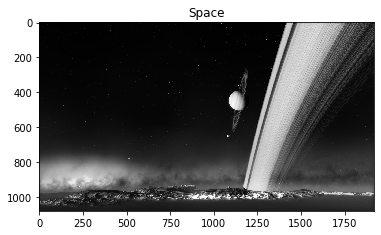

In [6]:
imgplot = plt.imshow(img, cmap='gray')
plt.title('Space')

## Aplicamos SVD a la imagen


In [7]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)


In [8]:
print(U.shape)
print(S.shape)
print(V_T.shape)


(1080, 1080)
(1080,)
(1080, 1920)


In [9]:
img_svd = (U*S)@V_T


In [10]:
img_svd.shape


(1080, 1920)

Text(0.5, 1.0, 'Imagen utilizando SVD')

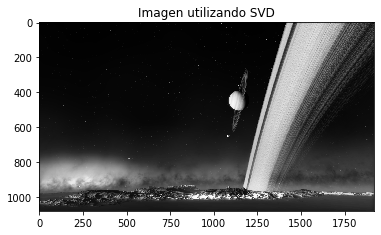

In [11]:
plt.imshow(img_svd, cmap='gray')

plt.title('Imagen utilizando SVD')

#### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular


In [12]:
(U[:,1]*S[1]).shape

(1080,)

In [13]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])

In [14]:
img_svd_1.shape

(1080, 1920)

Text(0.5, 1.0, 'SVD truncada a 1')

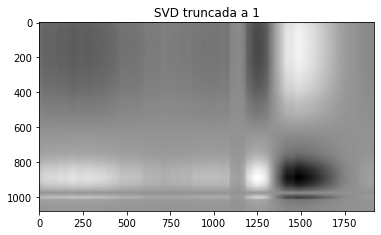

In [15]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')

#### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares


In [16]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])


Text(0.5, 1.0, 'SVD truncada a 2')

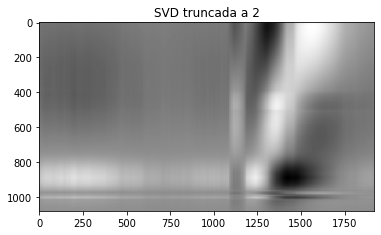

In [17]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')

#### Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

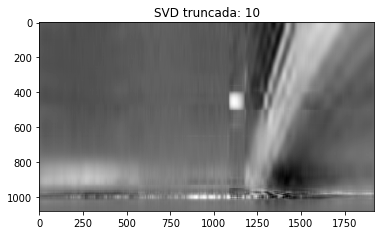

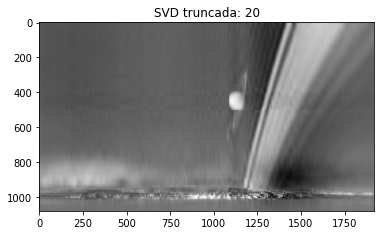

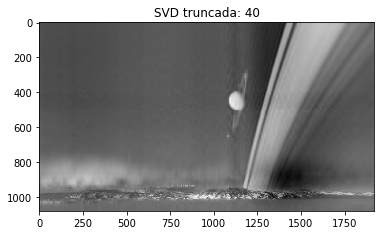

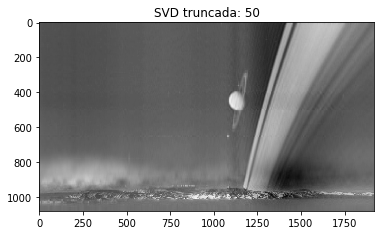

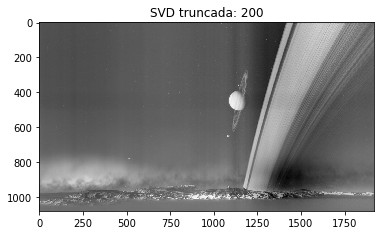

In [18]:
def reconstruir_imagen_n(n, i=1, img=0):
    if i == n:
        return img
    else:
        return img + reconstruir_imagen_n(n, i+1,np.outer((U[:,i]*S[i]),V_T[i,:]))

def img_svd_n(n):
    plt.imshow(reconstruir_imagen_n(n), cmap='gray')
    plt.title('SVD truncada: {}'.format(n))
    plt.show()

img_svd_n(10)
img_svd_n(20)
img_svd_n(40)
img_svd_n(50)
img_svd_n(200) #realizando este mismo ejercicio con el n=rank, la imagen se reconstruiría al 100%. 
